<a href="https://colab.research.google.com/github/aonvara/python_dataviz2024/blob/main/HW_9_Group_SC_(643020095_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 30/10**

# **HW 9: การบ้านครั้งที่ 9**


---

รายวิชา Basic Programming for Data Science and Data Visualization

นางสาวอรวรา กาญจนวัฒนา 643020095-1 (30/10/2567)

#**โจทย์**: HW9 present radar chart data india

##1. นำเข้าข้อมูลและจัดเตรียมข้อมูล

In [4]:
#นำเข้าข้อมูลที่ใช้
import pandas
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
movie_df = pd.read_csv('/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv', encoding='latin-1')
print(movie_df.shape)
movie_df.head()

(15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


##2. วิเคราะห์ข้อมูลเพื่อสร้าง radar chart: กราฟที่แสดงการเปรียบเทียบ Rating ของผู้กำกับ (Director) หลายคนในประเภทภาพยนตร์ต่าง ๆ เพื่อวิเคราะห์ว่าผู้กำกับคนไหนทำงานได้ดีในแต่ละ Genre

In [95]:
#เลือกเฉพาะ column ที่ต้องการนำมาวิเคราะห์
#top_director_df
top_director_df = movie_df[['Director', 'Rating', 'Duration', 'Votes', 'Genre']]
top_director_df = top_director_df.dropna()
top_director_df

,Director,Rating,Duration,Votes,Genre
1,Gaurav Bakshi,7.0,109 min,8,Drama
3,Ovais Khan,4.4,110 min,35,"Comedy, Romance"
5,Rahul Rawail,4.7,147 min,827,"Comedy, Drama, Musical"
6,Shoojit Sircar,7.4,142 min,"1,086","Drama, Romance, War"
8,Allyson Patel,5.6,82 min,326,"Horror, Mystery, Thriller"
...,...,...,...,...,...
15493,Mozez Singh,6.1,115 min,408,Drama
15494,Shyam Benegal,6.2,153 min,"1,496","Biography, Drama, History"
15503,S.P. Muthuraman,5.8,125 min,44,"Action, Crime, Drama"
15505,Kuku Kohli,4.5,129 min,655,"Action, Drama"


In [96]:
# prompt: สร้าง column ประเภทหนังเพิ่มเติมในตาราง top_director_df โดยยึดประเภทจากคำแรกใน column genre

# สร้างฟังก์ชันเพื่อดึงประเภทหนังจากคำแรกใน column genre
def get_main_genre(genre_str):
  genres = genre_str.split(', ')
  return genres[0]

# สร้าง column ใหม่ชื่อ 'main_Genre' โดยใช้ฟังก์ชัน get_main_genre
top_director_df['main_Genre'] = top_director_df['Genre'].apply(get_main_genre)

top_director_df.shape

(5819, 6)

In [97]:
# แสดงผลตาราง top_director_df
top_director_df.head()

,Director,Rating,Duration,Votes,Genre,main_Genre
1,Gaurav Bakshi,7.0,109 min,8,Drama,Drama
3,Ovais Khan,4.4,110 min,35,"Comedy, Romance",Comedy
5,Rahul Rawail,4.7,147 min,827,"Comedy, Drama, Musical",Comedy
6,Shoojit Sircar,7.4,142 min,"1,086","Drama, Romance, War",Drama
8,Allyson Patel,5.6,82 min,326,"Horror, Mystery, Thriller",Horror


In [98]:
#นำคำว่า min ออกจาก column Duration และเปลี่ยนเป็นข้อมูล int
top_director_df['Duration'] = top_director_df['Duration'].str.replace(' min', '').astype(int)

#เปลี่ยน column Votes เป็นข้อมูล int
top_director_df['Votes'] = top_director_df['Votes'].str.replace(',', '').astype(int)

In [99]:
top_director_df

,Director,Rating,Duration,Votes,Genre,main_Genre
1,Gaurav Bakshi,7.0,109,8,Drama,Drama
3,Ovais Khan,4.4,110,35,"Comedy, Romance",Comedy
5,Rahul Rawail,4.7,147,827,"Comedy, Drama, Musical",Comedy
6,Shoojit Sircar,7.4,142,1086,"Drama, Romance, War",Drama
8,Allyson Patel,5.6,82,326,"Horror, Mystery, Thriller",Horror
...,...,...,...,...,...,...
15493,Mozez Singh,6.1,115,408,Drama,Drama
15494,Shyam Benegal,6.2,153,1496,"Biography, Drama, History",Biography
15503,S.P. Muthuraman,5.8,125,44,"Action, Crime, Drama",Action
15505,Kuku Kohli,4.5,129,655,"Action, Drama",Action


In [100]:
# prompt: สร้างตารางผู้กำกับที่ทำหนังจำนวนมากกว่าควอไทล์ที่ 99 มีกี่คน

director_counts = top_director_df.groupby('Director')['Rating'].count()
quantile_99 = director_counts.quantile(0.99)
num_directors_above_quantile_99 = (director_counts > quantile_99).sum()
print(f"จำนวนผู้กำกับที่มีจำนวนหนังมากกว่าควอไทล์ที่ 99: {num_directors_above_quantile_99} คน")


จำนวนผู้กำกับที่มีจำนวนหนังมากกว่าควอไทล์ที่ 99: 25 คน


In [101]:
# prompt: ตัดตารางเอาเฉพาะ ผู้กำกับที่ทำหนังจำนวนมากกว่าควอไทล์ที่ 99 25 คน

# Filter directors based on the 99th quantile
directors_above_quantile = director_counts[director_counts > quantile_99].index.tolist()

# Select the top 25 directors
top_25_directors = directors_above_quantile[:25]

# Create a new DataFrame with only the top 25 directors
top_25_directors_df = top_director_df[top_director_df['Director'].isin(top_25_directors)]

# Display the new DataFrame
top_25_directors_df


,Director,Rating,Duration,Votes,Genre,main_Genre
22,Ram Gopal Varma,4.4,105,63,"Horror, Thriller",Horror
38,Vikram Bhatt,6.4,138,3100,"Horror, Mystery, Romance",Horror
41,Vikram Bhatt,4.5,144,1069,"Horror, Mystery, Romance",Horror
55,Raj N. Sippy,3.5,149,112,"Crime, Mystery, Thriller",Crime
84,Abbas Alibhai Burmawalla,5.7,140,4373,"Comedy, Mystery, Thriller",Comedy
...,...,...,...,...,...,...
15290,Rama Rao Tatineni,6.5,136,34,"Action, Comedy, Drama",Action
15311,Priyadarshan,5.7,175,803,"Comedy, Drama",Comedy
15328,Subhash Ghai,4.1,151,4147,"Comedy, Drama, Musical",Comedy
15341,Mahesh Bhatt,7.9,125,3007,Drama,Drama


In [114]:
# prompt: ผู้กำกับหนังแต่ละคนทำหนังประเภท Action Drama Comedy และ Crime กี่เรื่อง

# Group by Director and main_Genre, then count the number of movies for each combination
genre_counts = top_25_directors_df.groupby(['Director', 'main_Genre'])['Rating'].count().unstack(fill_value=0)

# Select only the desired genres
genre_counts = genre_counts[['Action', 'Drama', 'Comedy', 'Crime']]

# Display the results
genre_counts


main_Genre,Action,Drama,Comedy,Crime
Director,,,,
Abbas Alibhai Burmawalla,12,1,3,2
Babubhai Mistry,5,3,0,0
Basu Chatterjee,1,11,9,0
David Dhawan,21,2,18,0
Gulzar,1,13,1,1
Harmesh Malhotra,7,7,3,1
Hrishikesh Mukherjee,0,17,13,0
K. Bapaiah,13,6,0,1
Kanti Shah,11,3,1,0


In [118]:
# prompt: หาผู้กำกับ 3 คน ที่สร้างหนัง 4 ประเภท Action Drama Comedy และ Crime เยอะที่สุดและไม่เป็น 0

# Find directors with non-zero counts in all four genres
directors_with_all_genres = genre_counts[(genre_counts['Action'] > 0) &
                                        (genre_counts['Drama'] > 0) &
                                        (genre_counts['Comedy'] > 0) &
                                        (genre_counts['Crime'] > 0)]

# Calculate the total number of movies for each director in these genres
directors_with_all_genres['Total'] = directors_with_all_genres.sum(axis=1)

# Sort the directors by the total number of movies in descending order
sorted_directors = directors_with_all_genres.sort_values('Total', ascending=False)

# Get the top 3 directors
top_3_directors = sorted_directors.head(3).index.tolist()

print(f"ผู้กำกับ 3 คนที่สร้างหนัง 4 ประเภท Action, Drama, Comedy และ Crime เยอะที่สุดและไม่เป็น 0 คือ: {top_3_directors}")


ผู้กำกับ 3 คนที่สร้างหนัง 4 ประเภท Action, Drama, Comedy และ Crime เยอะที่สุดและไม่เป็น 0 คือ: ['Mahesh Bhatt', 'Priyadarshan', 'Ram Gopal Varma']


<ipython-input-118-0288ca7e1c94>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_with_all_genres['Total'] = directors_with_all_genres.sum(axis=1)


In [108]:
# prompt: จงหาจำนวนหนังแต่ละประเภทจาก main genre มากไปน้อย

genre_counts = top_25_directors_df.groupby('main_Genre')['Rating'].count().sort_values(ascending=False)
print(genre_counts)


main_Genre
Action         231
Drama          170
Comedy          87
Horror          24
Crime           23
Adventure       13
Romance         12
Musical         11
Family           6
Mystery          6
Fantasy          4
Biography        3
Thriller         2
Documentary      1
Name: Rating, dtype: int64


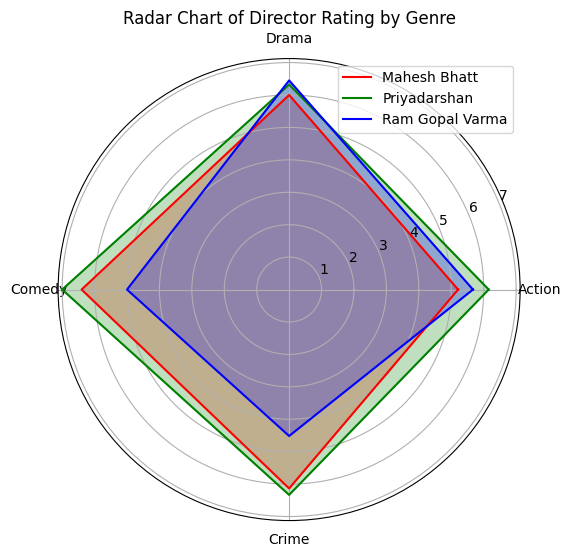

In [122]:
# prompt: เปลี่ยนสีกราฟเป็นสี RGB

import matplotlib.pyplot as plt
import numpy as np
# Filter the DataFrame for the selected directors and genres
selected_directors = ['Mahesh Bhatt', 'Priyadarshan', 'Ram Gopal Varma']
selected_genres = ['Action', 'Drama', 'Comedy', 'Crime']
filtered_df = top_25_directors_df[
    top_25_directors_df['Director'].isin(selected_directors) &
    top_25_directors_df['main_Genre'].isin(selected_genres)
]

# Group by Director and main_Genre, then calculate the mean Rating
director_genre_rating = filtered_df.groupby(['Director', 'main_Genre'])['Rating'].mean().unstack()

# Create a radar chart
labels = selected_genres
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']  # Define RGB colors for each director
for i, director in enumerate(selected_directors):
  values = director_genre_rating.loc[director].tolist()
  values += values[:1]
  ax.plot(angles, values, label=director, color=colors[i])
  ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right')
plt.title('Radar Chart of Director Rating by Genre')
plt.show()
